In [4]:
import pickle
import numpy as np

In [5]:
def log_to_file(file_name: str, message: str):
    import datetime
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    log_message = f"[{timestamp}] {message}"
    with open(file_name, "a") as f:
        f.write(f"{log_message}\n")

def print_size(file_name: str, obj, obj_name="N/A"):
    from pympler import asizeof
    memory_usage = asizeof.asizeof(obj)
    # Convert memory usage to a more readable format
    if memory_usage < 1024:
        memory_usage_str = f"{memory_usage} bytes"
    elif memory_usage < 1024 ** 2:
        memory_usage_str = f"{memory_usage / 1024} KB"
    elif memory_usage < 1024 ** 3:
        memory_usage_str = f"{memory_usage / (1024 ** 2)} MB"
    else:
        memory_usage_str = f"{memory_usage / (1024 ** 3)} GB"
    # Print the memory usage and object name
    log_to_file(file_name, f"Memory usage of {obj_name}: {memory_usage_str}")

In [6]:
with open("/Users/ziadh/Desktop/college/gp/temp/outliers/bak/core_points.pkl", 'rb') as f:
    core_points: np.ndarray = pickle.load(f)

# Furthur analytics on the output

In [4]:
from collections import Counter

log_to_file("logs/clustring.log", "Analysis of X, Y, Z of Core Points")

log_to_file("logs/clustring.log", f"X<{len(core_points[:,0]):,}>: {core_points[:,0].min():,} to {core_points[:,0].max():,}")
x_counter = Counter(core_points[:,0])
log_to_file("logs/clustring.log", f"We have {len(x_counter):,} unique X values")
log_to_file("logs/clustring.log", f"Most Common X: {x_counter.most_common(1)}, Least Two Common X: {x_counter.most_common()[:-3:-1]}")
# log_to_file("logs/clustring.log", x_counter)
log_to_file("logs/clustring.log", "-----------------------------------------------------")

log_to_file("logs/clustring.log", f"Y<{len(core_points[:,1]):,}>: {core_points[:,1].min():,} to {core_points[:,1].max():,}")
y_counter = Counter(core_points[:,1])
log_to_file("logs/clustring.log", f"We have {len(y_counter):,} unique Y values")
log_to_file("logs/clustring.log", f"Most Common Y: {y_counter.most_common(1)}, Least Two Common Y: {y_counter.most_common()[:-3:-1]}")
# log_to_file("logs/clustring.log", y_counter)
log_to_file("logs/clustring.log", "-----------------------------------------------------")

log_to_file("logs/clustring.log", f"Z<{len(core_points[:,2]):,}>: {core_points[:,2].min():,} to {core_points[:,2].max():,}")
z_counter = Counter(core_points[:,2])
log_to_file("logs/clustring.log", f"We have {len(z_counter):,} unique Z values")
log_to_file("logs/clustring.log", f"Most Common Z: {z_counter.most_common(1)}, Least Two Common Y: {z_counter.most_common()[:-3:-1]}")
# log_to_file("logs/clustring.log", z_counter)
log_to_file("logs/clustring.log", "-----------------------------------------------------")

In [5]:
import matplotlib.pyplot as plt
from typing import Final

NUM_PINS: Final[int] = 1_000_000

In [13]:
x_values_sorted = np.sort(core_points[:,0])
log_to_file("logs/x-values.log", "\n".join([f"{x:,}" for x in x_values_sorted]))
y_values_sorted = np.sort(core_points[:,1])
log_to_file("logs/y-values.log", "\n".join([f"{y:,}" for y in y_values_sorted]))
z_values_sorted = np.sort(core_points[:,2])
log_to_file("logs/z-values.log", "\n".join([f"{z:,}" for z in z_values_sorted]))

In [14]:
log_file = "logs/points.log"

# Sort points by x, y, and z values
sorted_points = core_points[np.lexsort(core_points.T[::-1])]

# Save points to log file in a table format with tabs
np.savetxt(log_file, sorted_points, delimiter="\t", fmt="%.6f")

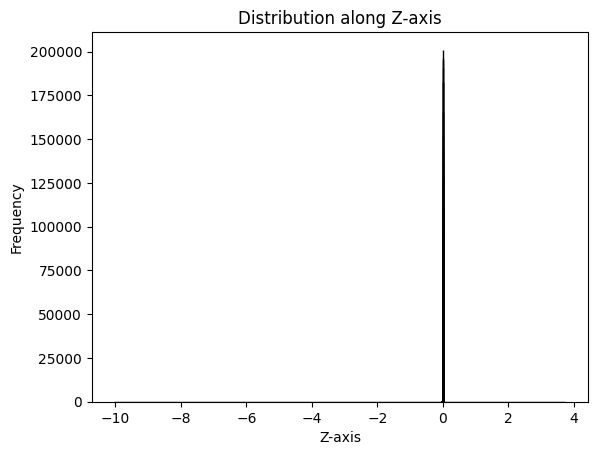

In [16]:
import matplotlib.pyplot as plt

z_values = core_points[:, 2]

# Create histogram plot
plt.hist(z_values, bins=1_000_000, edgecolor='black')
plt.xlabel('Z-axis')
plt.ylabel('Frequency')
plt.title('Distribution along Z-axis')
plt.show()

We have 6,648,490 unique X values
Most Common X: [(0.31869838, 6)], Least Two Common X: [(0.14217633, 1), (0.10885379, 1)]
Max X: 3,528.35546875, Min X: -10,419.5302734375


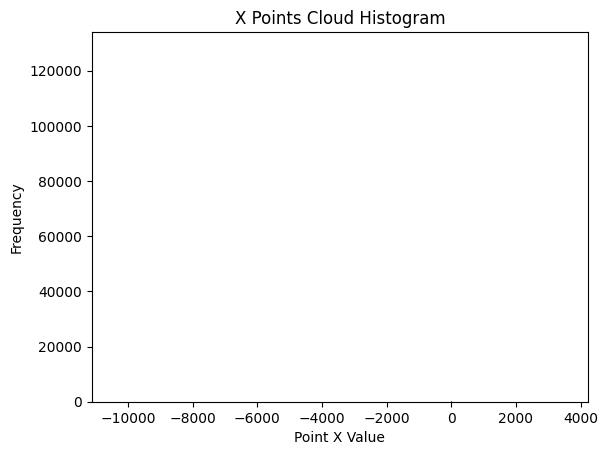

In [6]:
# x_counter = {k: v for k, v in x_counter.items() if -4 < k < 4}
# new_x_counter = Counter(x_counter)
print(f"We have {len(x_counter):,} unique X values")
print(f"Most Common X: {x_counter.most_common(1)}, Least Two Common X: {x_counter.most_common()[:-3:-1]}")
print(f"Max X: {max(x_counter):,}, Min X: {min(x_counter):,}")
plt.hist(list(x_counter.keys()), weights=list(x_counter.values()), bins=NUM_PINS, label='x-axis')
plt.title('X Points Cloud Histogram')
plt.xlabel('Point X Value')
plt.ylabel('Frequency')
plt.savefig('x_points_histo.png')

We have 6,475,699 unique Y values
Most Common Y: [(0.585349, 7)], Least Two Common Y: [(-1.1482979, 1), (-1.2050352, 1)]
Max Y: 6,670.2939453125, Min Y: -22,526.87890625


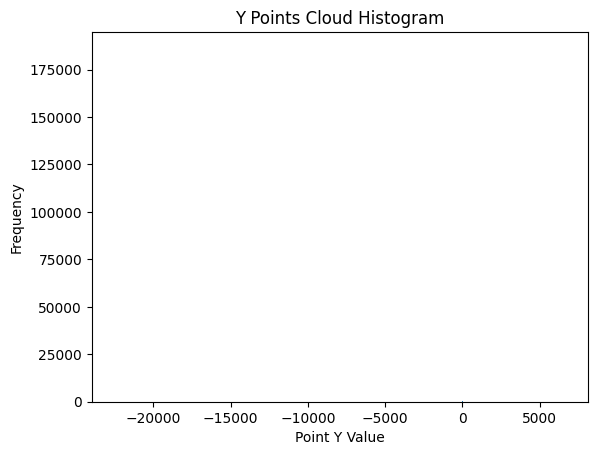

In [7]:
# x_counter = {k: v for k, v in x_counter.items() if -4 < k < 4}
# new_x_counter = Counter(x_counter)
print(f"We have {len(y_counter):,} unique Y values")
print(f"Most Common Y: {y_counter.most_common(1)}, Least Two Common Y: {y_counter.most_common()[:-3:-1]}")
print(f"Max Y: {max(y_counter):,}, Min Y: {min(y_counter):,}")
plt.hist(list(y_counter.keys()), weights=list(y_counter.values()), bins=NUM_PINS, label='y-axis')
plt.title('Y Points Cloud Histogram')
plt.xlabel('Point Y Value')
plt.ylabel('Frequency')
plt.savefig('y_points_histo.png')

We have 6,615,882 unique Z values
Most Common Z: [(0.00012467851, 6)], Least Two Common Z: [(-0.00018198085, 1), (-0.00019840841, 1)]
Max Z: 3.747781753540039, Min Z: -10.029297828674316


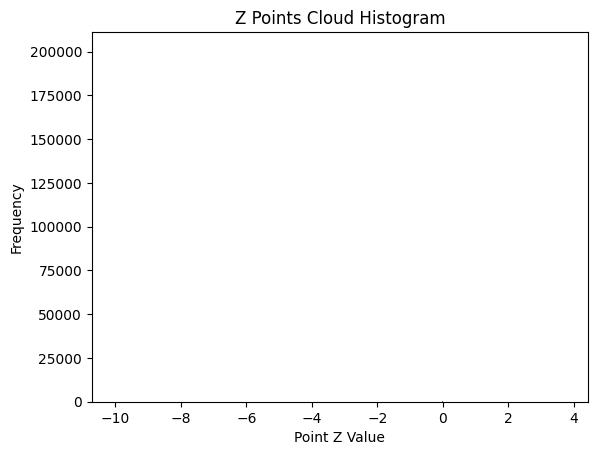

In [8]:
# x_counter = {k: v for k, v in x_counter.items() if -4 < k < 4}
# new_x_counter = Counter(x_counter)
print(f"We have {len(z_counter):,} unique Z values")
print(f"Most Common Z: {z_counter.most_common(1)}, Least Two Common Z: {z_counter.most_common()[:-3:-1]}")
print(f"Max Z: {max(z_counter):,}, Min Z: {min(z_counter):,}")
plt.hist(list(z_counter.keys()), weights=list(z_counter.values()), bins=NUM_PINS, label='z-axis')
plt.title('Z Points Cloud Histogram')
plt.xlabel('Point Z Value')
plt.ylabel('Frequency')
plt.savefig('z_points_histo.png')

In [7]:
# 7. 3D reconstruction
log_to_file("logs/tune.log", "3D reconstruction starts ....")
import open3d as o3d
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(core_points[:,:3])
# Save it as a .PLY file
o3d.io.write_point_cloud("point_cloud.ply", pcd)
# o3d.visualization.draw_geometries([pcd])

True